In [1]:
%matplotlib inline


# 1. Prepare Problem #

#    a. Load libraries #
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#    b. Load dataset #
input_file = 'online_shoppers_intention.csv'
dataset = pd.read_csv(input_file)
print(dataset)


       Administrative  Administrative_Duration  Informational  \
0                   0                 0.000000              0   
1                   0                 0.000000              0   
2                   0                 0.000000              0   
3                   0                 0.000000              0   
4                   0                 0.000000              0   
5                   0                 0.000000              0   
6                   0                 0.000000              0   
7                   1                 0.000000              0   
8                   0                 0.000000              0   
9                   0                 0.000000              0   
10                  0                 0.000000              0   
11                  0                 0.000000              0   
12                  0                 0.000000              0   
13                  0                 0.000000              0   
14                  0    

In [2]:
# 2. Summarize Data #

#    a. Descriptive statistics #
# Summary
dataset.describe() #equivalent to summary in R

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [3]:
# VarType (Pandas version to check)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
# VarType (another Pandas version to check)
print(dataset.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [5]:
# check if any field include NA value ~
dataset.isnull().values.any()

False

In [6]:
# There are many 'bool' and 'object' string values within columns, we need to convert them into integer first here

# We first transfer the either 'object' type columns and 'bool' columns into 
# category value
dataset['Month'] = dataset['Month'].astype('category')
dataset['VisitorType'] = dataset['VisitorType'].astype('category')
dataset['Weekend'] = dataset['Weekend'].astype('category')
dataset['Revenue'] = dataset['Revenue'].astype('category')

In [7]:
# Then we selected all above transfered columns
cat_columns = dataset.select_dtypes(['category']).columns
print(cat_columns)

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')


In [8]:
# Then we transfer all those category value into integer like below command
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)
print(dataset)

       Administrative  Administrative_Duration  Informational  \
0                   0                 0.000000              0   
1                   0                 0.000000              0   
2                   0                 0.000000              0   
3                   0                 0.000000              0   
4                   0                 0.000000              0   
5                   0                 0.000000              0   
6                   0                 0.000000              0   
7                   1                 0.000000              0   
8                   0                 0.000000              0   
9                   0                 0.000000              0   
10                  0                 0.000000              0   
11                  0                 0.000000              0   
12                  0                 0.000000              0   
13                  0                 0.000000              0   
14                  0    

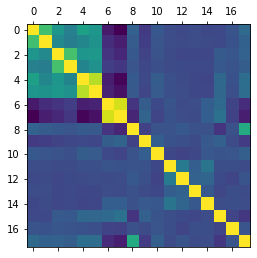

In [9]:
# Corr Matrix

#Simple version of the corr matrix
plt.matshow(dataset.corr())
plt.show()

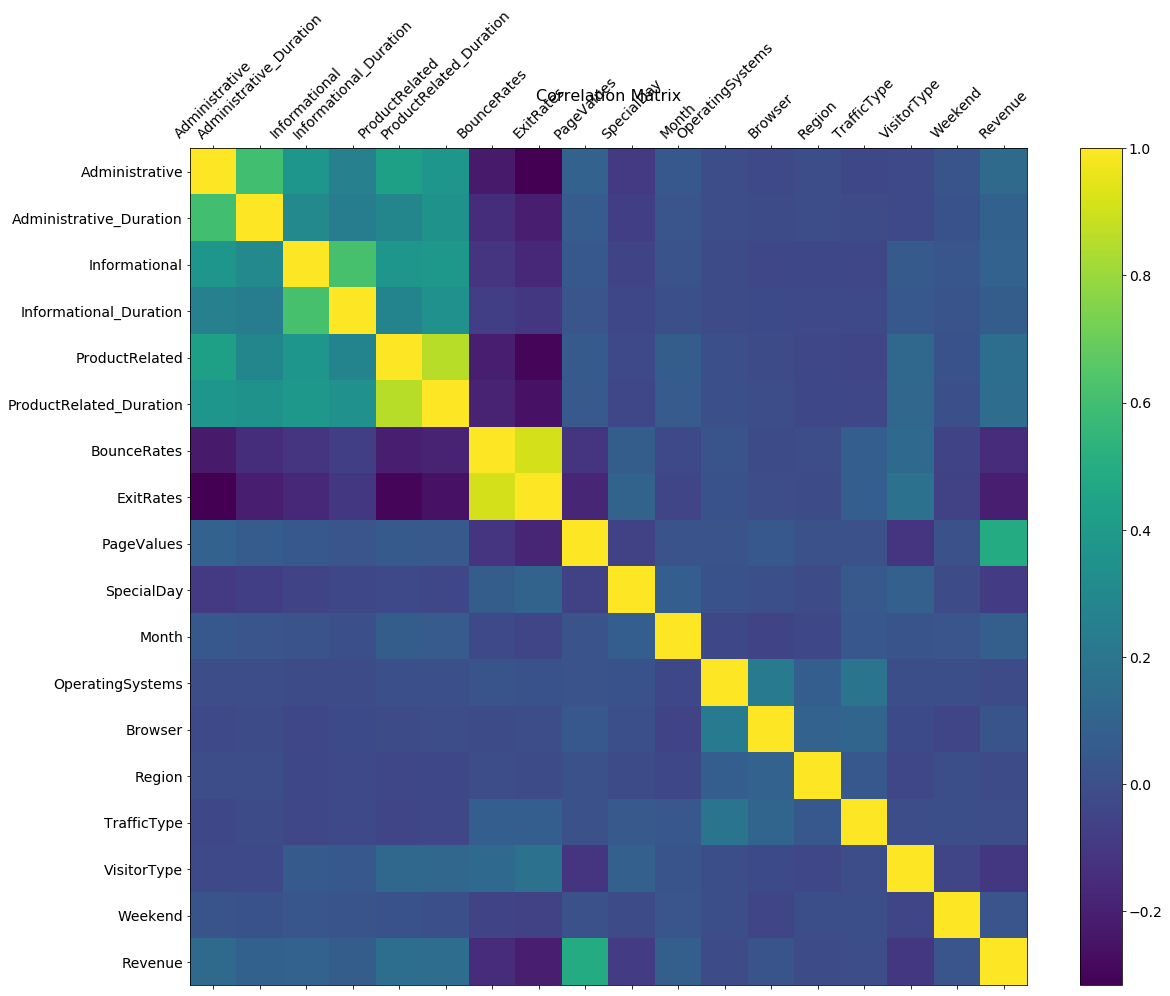

In [10]:
# Another version of the advanced version of corr matrix visulization.

f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [11]:
# Another fancy version of the visulization to present same information of corr matrix by using built in pandas tools.

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1,0.6,0.38,0.26,0.43,0.37,-0.22,-0.32,0.099,-0.095,0.049,-0.0063,-0.025,-0.0055,-0.034,-0.026,0.026,0.14
Administrative_Duration,0.6,1,0.3,0.24,0.29,0.36,-0.14,-0.21,0.068,-0.073,0.029,-0.0073,-0.015,-0.0056,-0.014,-0.024,0.015,0.094
Informational,0.38,0.3,1,0.62,0.37,0.39,-0.12,-0.16,0.049,-0.048,0.02,-0.0095,-0.038,-0.029,-0.034,0.056,0.036,0.095
Informational_Duration,0.26,0.24,0.62,1,0.28,0.35,-0.074,-0.11,0.031,-0.031,0.006,-0.0096,-0.019,-0.027,-0.025,0.045,0.024,0.07
ProductRelated,0.43,0.29,0.37,0.28,1,0.86,-0.2,-0.29,0.056,-0.024,0.07,0.0043,-0.013,-0.038,-0.043,0.13,0.016,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1,-0.18,-0.25,0.053,-0.036,0.061,0.003,-0.0074,-0.033,-0.036,0.12,0.0073,0.15
BounceRates,-0.22,-0.14,-0.12,-0.074,-0.2,-0.18,1,0.91,-0.12,0.073,-0.024,0.024,-0.016,-0.0065,0.078,0.14,-0.047,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1,-0.17,0.1,-0.039,0.015,-0.0044,-0.0089,0.079,0.18,-0.063,-0.21
PageValues,0.099,0.068,0.049,0.031,0.056,0.053,-0.12,-0.17,1,-0.064,0.022,0.019,0.046,0.011,0.013,-0.11,0.012,0.49
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.036,0.073,0.1,-0.064,1,0.079,0.013,0.0035,-0.016,0.052,0.086,-0.017,-0.082


In [12]:
#Count of class labels
dataset.groupby('Revenue').size()

Revenue
0    10422
1     1908
dtype: int64

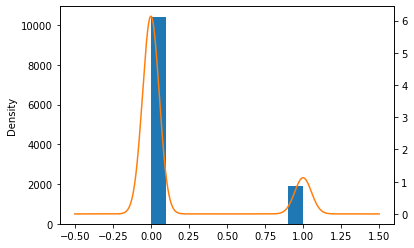

In [43]:
#    b. Visulization 
# visulize the target dependency "Revenue" in histogram & density by using pandas library
ax = dataset.Revenue.plot(kind='hist')
dataset.Revenue.plot(kind='kde', ax=ax, secondary_y=True)

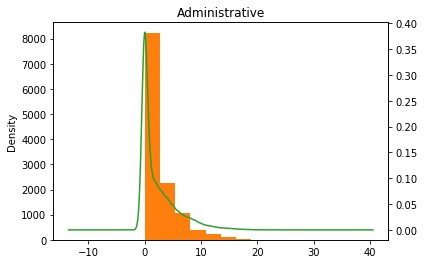

In [42]:
# Show all other column's histogram & density charts
# Administrative
ax = dataset.Administrative.plot(kind='hist')
dataset.Administrative.plot(kind='kde', ax=ax, secondary_y=True)

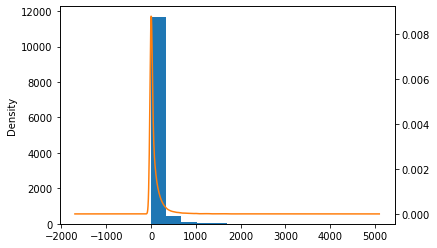

In [44]:
# Show all other column's histogram & density charts
# Administrative_Duration
ax = dataset.Administrative_Duration.plot(kind='hist')
dataset.Administrative_Duration.plot(kind='kde', ax=ax, secondary_y=True)

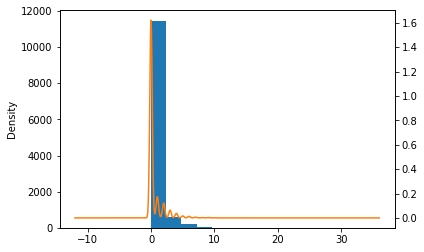

In [45]:
# Show all other column's histogram & density charts
# Informational
ax = dataset.Informational.plot(kind='hist')
dataset.Informational.plot(kind='kde', ax=ax, secondary_y=True)

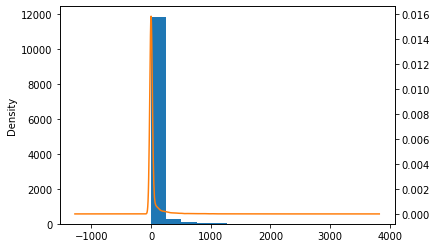

In [46]:
# Show all other column's histogram & density charts
# Informational_Duration
ax = dataset.Informational_Duration.plot(kind='hist')
dataset.Informational_Duration.plot(kind='kde', ax=ax, secondary_y=True)

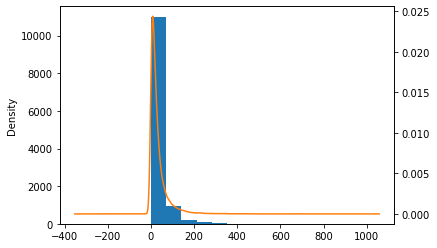

In [47]:
# Show all other column's histogram & density charts
# ProductRelated
ax = dataset.ProductRelated.plot(kind='hist')
dataset.ProductRelated.plot(kind='kde', ax=ax, secondary_y=True)

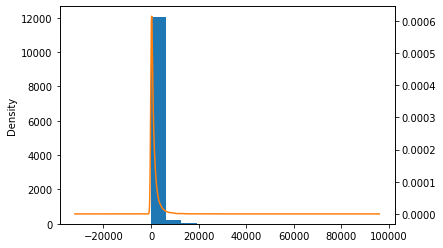

In [48]:
# Show all other column's histogram & density charts
# ProductRelated_Duration
ax = dataset.ProductRelated_Duration.plot(kind='hist')
dataset.ProductRelated_Duration.plot(kind='kde', ax=ax, secondary_y=True)

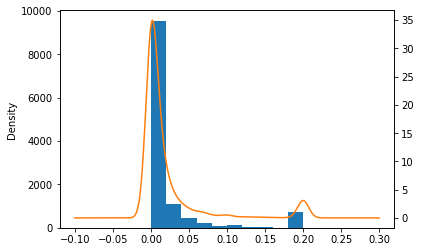

In [49]:
# Show all other column's histogram & density charts
# BounceRates
ax = dataset.BounceRates.plot(kind='hist')
dataset.BounceRates.plot(kind='kde', ax=ax, secondary_y=True)

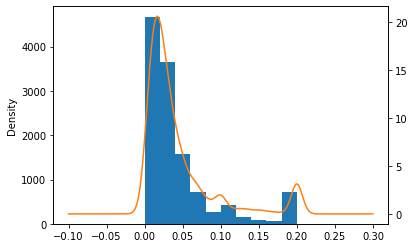

In [50]:
# Show all other column's histogram & density charts
# ExitRates
ax = dataset.ExitRates.plot(kind='hist')
dataset.ExitRates.plot(kind='kde', ax=ax, secondary_y=True)

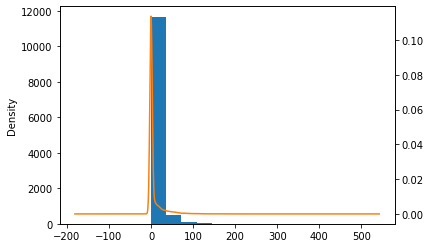

In [51]:
# Show all other column's histogram & density charts
# PageValues
ax = dataset.PageValues.plot(kind='hist')
dataset.PageValues.plot(kind='kde', ax=ax, secondary_y=True)

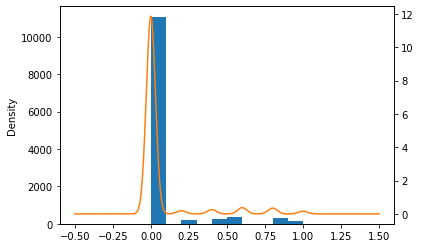

In [52]:
# Show all other column's histogram & density charts
# SpecialDay
ax = dataset.SpecialDay.plot(kind='hist')
dataset.SpecialDay.plot(kind='kde', ax=ax, secondary_y=True)

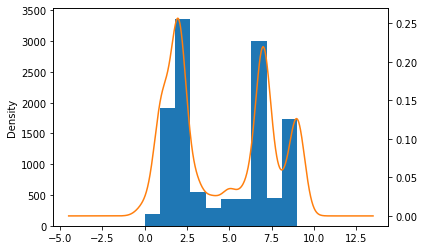

In [53]:
# Show all other column's histogram & density charts
# Month
ax = dataset.Month.plot(kind='hist')
dataset.Month.plot(kind='kde', ax=ax, secondary_y=True)

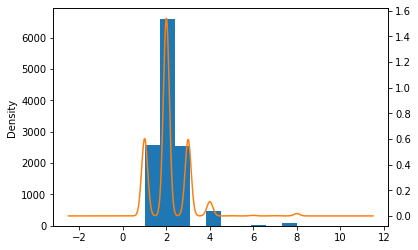

In [54]:
# Show all other column's histogram & density charts
# OperatingSystems
ax = dataset.OperatingSystems.plot(kind='hist')
dataset.OperatingSystems.plot(kind='kde', ax=ax, secondary_y=True)

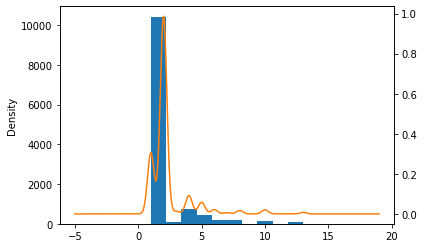

In [55]:
# Show all other column's histogram & density charts
# Browser
ax = dataset.Browser.plot(kind='hist')
dataset.Browser.plot(kind='kde', ax=ax, secondary_y=True)

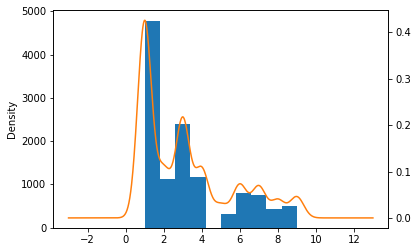

In [56]:
# Show all other column's histogram & density charts
# Region
ax = dataset.Region.plot(kind='hist')
dataset.Region.plot(kind='kde', ax=ax, secondary_y=True)

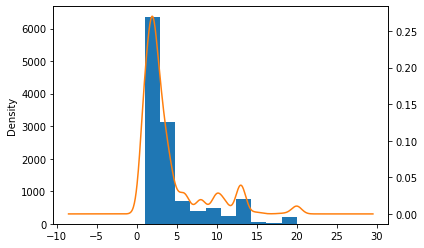

In [57]:
# Show all other column's histogram & density charts
# TrafficType
ax = dataset.TrafficType.plot(kind='hist')
dataset.TrafficType.plot(kind='kde', ax=ax, secondary_y=True)

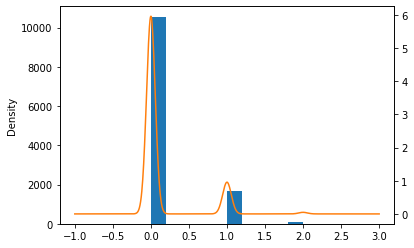

In [58]:
# Show all other column's histogram & density charts
# VisitorType
ax = dataset.VisitorType.plot(kind='hist')
dataset.VisitorType.plot(kind='kde', ax=ax, secondary_y=True)

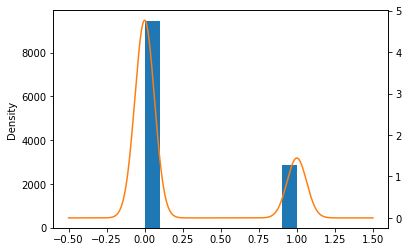

In [59]:
# Show all other column's histogram & density charts
# Weekend
ax = dataset.Weekend.plot(kind='hist')
dataset.Weekend.plot(kind='kde', ax=ax, secondary_y=True)

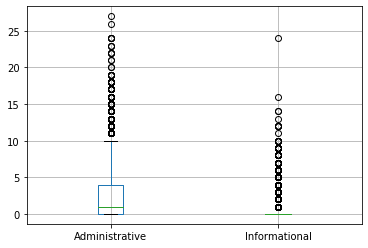

In [64]:
# Density
boxplot = dataset.boxplot(column=['Administrative', 'Informational'])

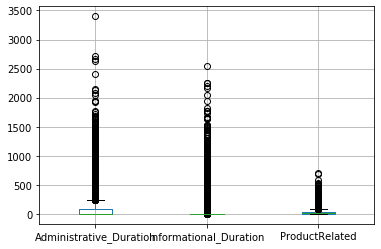

In [68]:
boxplot = dataset.boxplot(column=['Administrative_Duration', 'Informational_Duration', 'ProductRelated'])

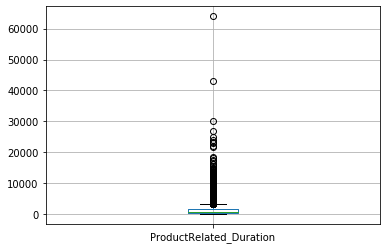

In [70]:
boxplot = dataset.boxplot(column=['ProductRelated_Duration'])

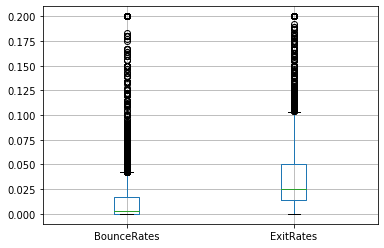

In [75]:
boxplot = dataset.boxplot(column=['BounceRates', 'ExitRates'])

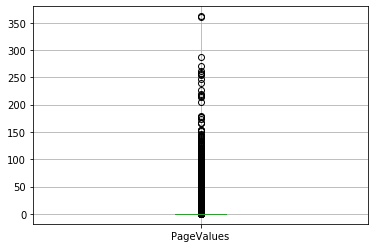

In [76]:
boxplot = dataset.boxplot(column=['PageValues'])

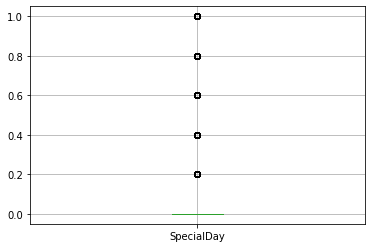

In [77]:
boxplot = dataset.boxplot(column=['SpecialDay'])

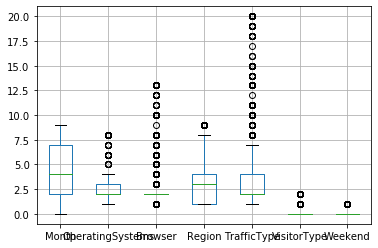

In [83]:
boxplot = dataset.boxplot(column=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'])

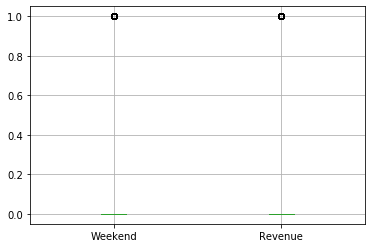

In [84]:
boxplot = dataset.boxplot(column=['Weekend', 'Revenue'])

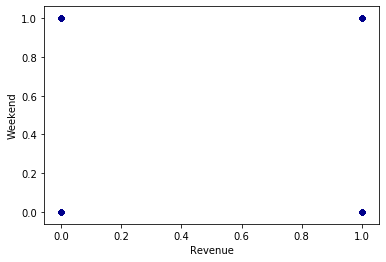

In [86]:
# Some example of feature scatter by using pandas
ax = dataset.plot.scatter(x='Revenue', y='Weekend', c='DarkBlue')

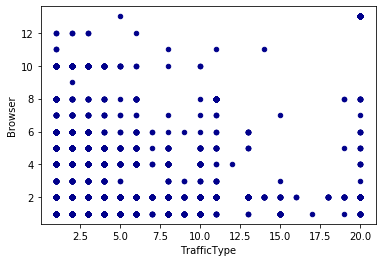

In [87]:
ax = dataset.plot.scatter(x='TrafficType', y='Browser', c='DarkBlue')

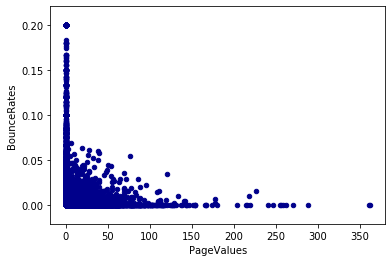

In [88]:
ax = dataset.plot.scatter(x='PageValues', y='BounceRates', c='DarkBlue')

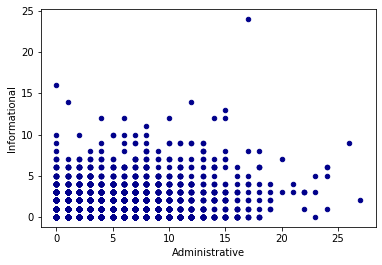

In [89]:
ax = dataset.plot.scatter(x='Administrative', y='Informational', c='DarkBlue')

In [ ]:
# 3. Prepare Data
#    a. Data Cleaning 
#       Because we have checked the NA value, 
#       and transferd the string value & category value into integer, so we are already done the cleaning part

#    b. Feature Selection
#       Unlike the complex problem which have hundreds of the feature, here we only have around 17 features, 
#       so we choose all of them and did not do feature selection.


#    c. Testing the assumption
#       N/A

#    d. Data Transforms 
#       We already did the transformation from previous steps.

In [90]:
# 4. Evaluate Algorithms
#    a. Split-out validation dataset.
np.random.seed(888)
msk = np.random.rand(len(dataset)) <= 0.666
train = dataset[msk]
test = dataset[~msk]
print(train['Revenue'].value_counts(), len(train))
print(test['Revenue'].value_counts(), len(test))

0    6874
1    1288
Name: Revenue, dtype: int64 8162
0    3548
1     620
Name: Revenue, dtype: int64 4168


In [91]:
features = list(dataset.columns[:-1])
print(features)
y = train["Revenue"]
X = train[features]

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [94]:
#    b. Test options and evaluation metrics

from sklearn import linear_model
from sklearn.metrics import roc_auc_score

# Lasso 
model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X, y)

y_pred_lasso = model_lasso.predict(test[features])
y_true = list(test["Revenue"])

AUC_ROC_SCORE_lasso = roc_auc_score(y_true, y_pred_lasso)
print(AUC_ROC_SCORE_lasso)

0.8907069407571734


In [95]:
# Linear Regression 
model_LinearRegression = linear_model.LinearRegression()
model_LinearRegression.fit(X, y)

y_pred_LinearRegression = model_LinearRegression.predict(test[features])
y_true = list(test["Revenue"])

AUC_ROC_SCORE_LinearRegression = roc_auc_score(y_true, y_pred_LinearRegression)
print(AUC_ROC_SCORE_LinearRegression)

0.904626868385642


In [96]:
# Ridge Regression
model_Ridge = linear_model.Ridge(alpha=.5)
model_Ridge.fit(X, y)

y_pred_Ridge = model_Ridge.predict(test[features])
y_true = list(test["Revenue"])

AUC_ROC_SCORE_Ridge = roc_auc_score(y_true, y_pred_Ridge)
print(AUC_ROC_SCORE_Ridge)

0.905593792050042


In [97]:
# ElasticNet, (this is GLM in R language)
from sklearn.linear_model import ElasticNet

model_ElasticNet = ElasticNet(random_state=0)
model_ElasticNet.fit(X, y)

y_pred_ElasticNet = model_ElasticNet.predict(test[features])
y_true = list(test["Revenue"])

AUC_ROC_SCORE_ElasticNet = roc_auc_score(y_true, y_pred_ElasticNet)
print(AUC_ROC_SCORE_ElasticNet)

0.8875784176455613
